# Required libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [6]:
# Replace Input file path with the path to input file.
input_file_path = "C:/Users/Dell/Downloads/movies.dat"

In [7]:
# Replace output file path with the desired path for the output csv file
output_file_path = "movies.csv"

In [8]:
# Read .dat file a Dataframe suingSpecific encoding
df_movie = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

In [9]:
# Dataframe to csv file
df_movie.to_csv(output_file_path, index=False)
df_movie.head(20)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [10]:
df_movie.columns = ['Movie_Id', 'Movie_Title','Genre']
df_movie.dropna(inplace=True)
df_movie.head(12)

,Movie_Id,Movie_Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
df_movie.tail(12)

,Movie_Id,Movie_Title,Genre
3871,3941,Sorority House Massacre (1986),Horror
3872,3942,Sorority House Massacre II (1990),Horror
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama


In [12]:
df_movie.shape  

(3883, 3)

In [13]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_Id     3883 non-null   int64 
 1   Movie_Title  3883 non-null   object
 2   Genre        3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [14]:
# Cheak missing values
df_movie.isnull()

,Movie_Id,Movie_Title,Genre
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3878,False,False,False
3879,False,False,False
3880,False,False,False
3881,False,False,False


In [15]:
df_movie.isnull().sum()

Movie_Id       0
Movie_Title    0
Genre          0
dtype: int64

# Load Rating Dataset

In [16]:
# # Replace Input file path with the path to input file.
input_file_path = "C:/Users/Dell/Downloads/ratings.dat/ratings.dat"

In [17]:
# Replace output file path with the desired path for the output csv file
output_file_path = "ratings.csv"

In [18]:
# Read .dat file a Dataframe suingSpecific encoding
df_rating = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

In [19]:
# Dataframe to csv file
df_rating.to_csv(output_file_path, index=False)
df_rating.head(20)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [20]:
df_rating.columns = ['Id', 'Movie_Id','Rating','Timestamp']
df_rating.dropna(inplace=True)
df_rating.head(12)

,Id,Movie_Id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [21]:
df_rating.tail(12)

,Id,Movie_Id,Rating,Timestamp
1000197,6040,2020,3,956715288
1000198,6040,2021,3,956716374
1000199,6040,2022,5,956716207
1000200,6040,2028,5,956704519
1000201,6040,1080,4,957717322
1000202,6040,1089,4,956704996
1000203,6040,1090,3,956715518
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746


In [22]:
df_rating.shape

(1000209, 4)

In [23]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   Id         1000209 non-null  int64
 1   Movie_Id   1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [24]:
#Check missing values
df_rating.isnull().sum()

Id           0
Movie_Id     0
Rating       0
Timestamp    0
dtype: int64

# Load Users Dataset

In [25]:
# # Replace Input file path with the path to input file.
input_file_path = "C:/Users/Dell/Downloads/users.dat"

In [26]:
# Replace output file path with the desired path for the output csv file
output_file_path = "users.csv"

In [27]:
# Read .dat file a Dataframe suingSpecific encoding
df_users = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

In [28]:
# Dataframe to csv file
df_users.to_csv(output_file_path, index=False)
df_users.head(20)

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [29]:
df_users.columns = ['user_Id','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head(12)

,user_Id,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [30]:
df_users.tail()

,user_Id,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [31]:
# Chenge starting values to integer
df_users['Gender'].replace({'M':0, 'F':1}, inplace = True)
df_users

,user_Id,Gender,Age,Occupation,Zip-code
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455
...,...,...,...,...,...
6035,6036,1,25,15,32603
6036,6037,1,45,1,76006
6037,6038,1,56,1,14706
6038,6039,1,45,0,01060


In [32]:
df_users.shape

(6040, 5)

In [33]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_Id     6040 non-null   int64 
 1   Gender      6040 non-null   int64 
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(4), object(1)
memory usage: 236.1+ KB


In [34]:
# Check missing values
df_users.isnull().sum()

user_Id       0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Finding the relations between in datasets

In [35]:
# Distinct values of dataset in MovieIds
unique_counts = df_rating['Movie_Id'].nunique()

In [36]:
print('Movie_Id:',unique_counts)

Movie_Id: 3706


In [37]:
# Min values of dataset in MovieIds
min_rating = df_rating['Movie_Id'].min()

In [38]:
print("'{}':{}".format('Movie_Id',min_rating))


'Movie_Id':1


In [39]:
# Max values of dataset in moviIds
max_rating = df_rating['Movie_Id'].max()


In [40]:
print("'{}':{}".format('Movie_Id',max_rating))


'Movie_Id':3952


In [41]:
# Distinct values of dataset in Ids
unique_counts = df_rating['Id'].nunique()
print('Movie_Id:',unique_counts)

Movie_Id: 6040


In [42]:
# Min values of dataset in Ids
min_rating = df_rating['Id'].min()
print("'{}':{}".format('Id',min_rating))

'Id':1


In [43]:
# Max values of dataset in moviIds
max_rating = df_rating['Id'].max()
print("'{}':{}".format('Id',max_rating))

'Id':6040


In [62]:
merged_df = pd.merge(df_rating, df_users, left_on = 'Id', right_on='user_Id')
merged_df = pd.merge(df_rating, df_movie, on='Movie_Id')
merged_df.head()

,Id,Movie_Id,Rating,Timestamp,Movie_Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [63]:
merged_df.shape

(1000209, 6)

In [64]:
merged_df.info(12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Id           1000209 non-null  int64 
 1   Movie_Id     1000209 non-null  int64 
 2   Rating       1000209 non-null  int64 
 3   Timestamp    1000209 non-null  int64 
 4   Movie_Title  1000209 non-null  object
 5   Genre        1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [65]:
merged_df.tail(12)

,Id,Movie_Id,Rating,Timestamp,Movie_Title,Genre
1000197,5334,3323,3,960796159,Chain of Fools (2000),Comedy|Crime
1000198,5334,127,1,960795494,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama
1000199,5334,3382,5,960796159,Song of Freedom (1936),Drama
1000200,5420,1843,3,960156505,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,286,3,960240881,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,3530,4,959816296,Smoking/No Smoking (1993),Comedy
1000203,5556,2198,3,959445515,Modulations (1998),Documentary
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama


In [66]:
#ceak missing values
merged_df.isnull().sum()

Id             0
Movie_Id       0
Rating         0
Timestamp      0
Movie_Title    0
Genre          0
dtype: int64

In [67]:
# to count the users using Movie Id amd Rating
rating_counts = merged_df.groupby(['Movie_Id','Rating']).size().reset_index(name = 'UserCount') 

In [68]:
#To get movie which has more rating than 100
filter_df = rating_counts[rating_counts['UserCount']>=100]

In [70]:
filter_df = pd.merge(filter_df, merged_df[['Movie_Id','Rating','Genre']])
filter_df

,Movie_Id,Rating,UserCount,Genre
0,1,3,345,Animation|Children's|Comedy
1,1,3,345,Animation|Children's|Comedy
2,1,3,345,Animation|Children's|Comedy
3,1,3,345,Animation|Children's|Comedy
4,1,3,345,Animation|Children's|Comedy
...,...,...,...,...
674616,3952,4,181,Drama|Thriller
674617,3952,4,181,Drama|Thriller
674618,3952,4,181,Drama|Thriller
674619,3952,4,181,Drama|Thriller


In [71]:
filter_df.shape

(674621, 4)

In [78]:
# After combine all the datasets
df = pd.concat([df_movie, df_rating, df_users], axis=1)
df.head(20)

,Movie_Id,Movie_Title,Genre,Id,Movie_Id,Rating,Timestamp,user_Id,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,1.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,0.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,0.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,0.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,0.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,1.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,0.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,0.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,0.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,1.0,35.0,1.0,95370


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Movie_Id     3883 non-null     float64
 1   Movie_Title  3883 non-null     object 
 2   Genre        3883 non-null     object 
 3   Id           1000209 non-null  int64  
 4   Movie_Id     1000209 non-null  int64  
 5   Rating       1000209 non-null  int64  
 6   Timestamp    1000209 non-null  int64  
 7   user_Id      6040 non-null     float64
 8   Gender       6040 non-null     float64
 9   Age          6040 non-null     float64
 10  Occupation   6040 non-null     float64
 11  Zip-code     6040 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 91.6+ MB


# Data Visualization 

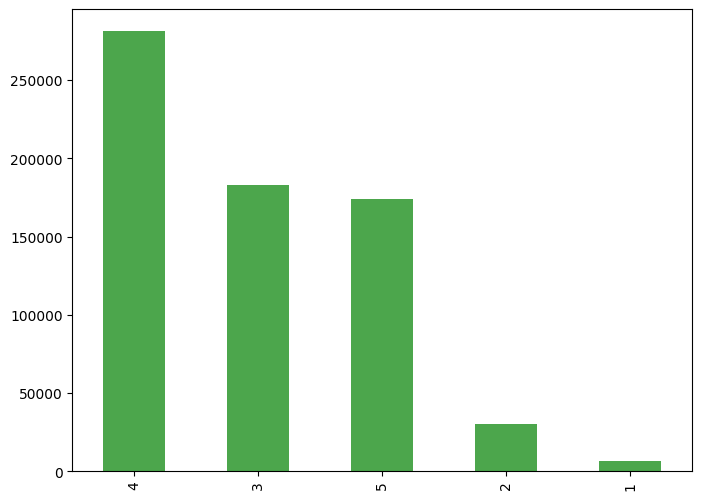

In [118]:
filter_df['Rating'].value_counts().plot(kind='bar',alpha = 0.7,figsize=(8,6),color='Green')
plt.show()

<AxesSubplot: >

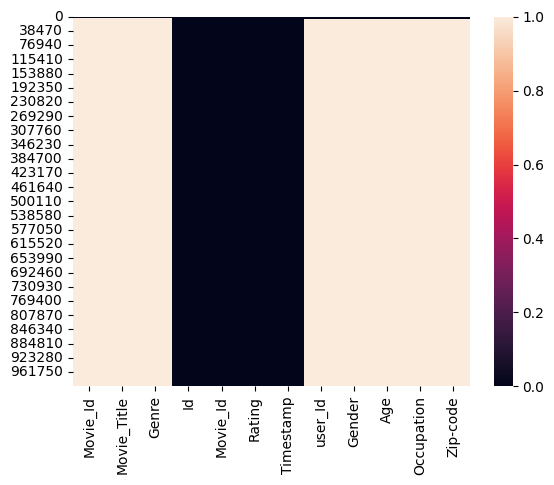

In [124]:
sns.heatmap(df.isnull())

Text(0.5, 0, 'age')

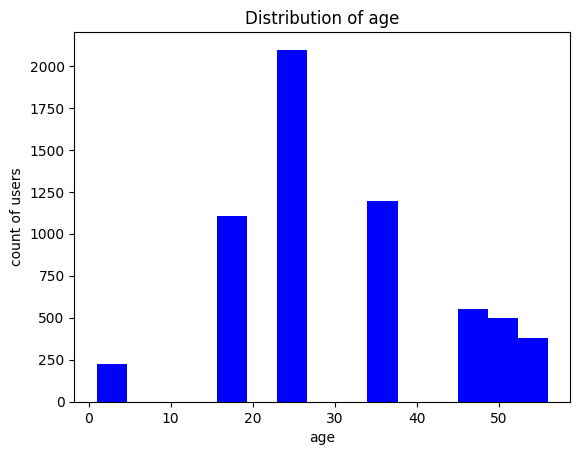

In [122]:
# Histogram for combined datasets
df.Age.plot.hist(bins = 15, color='blue')
plt.title('Distribution of age')
plt.ylabel('count of users')
plt.xlabel('age')

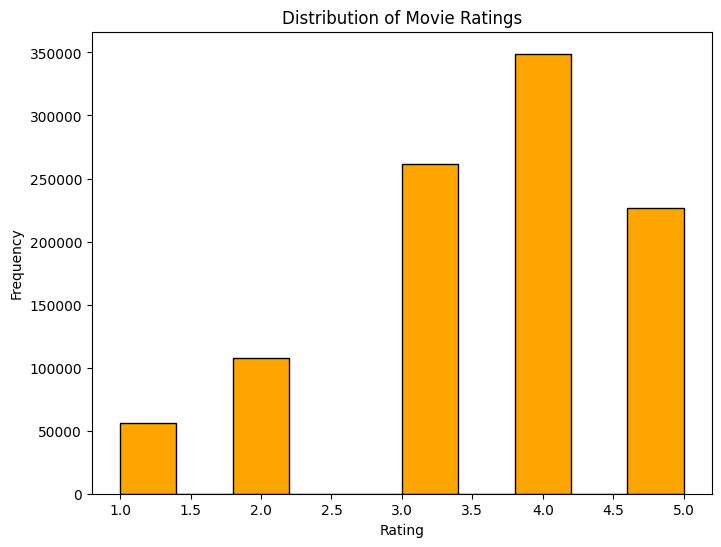

In [121]:
# Hostogram for movie rating
plt.figure(figsize=(8, 6))
plt.hist(df_rating['Rating'], bins=10, color='Orange', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6176\1664086893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='red')


<AxesSubplot: xlabel='Age', ylabel='Density'>

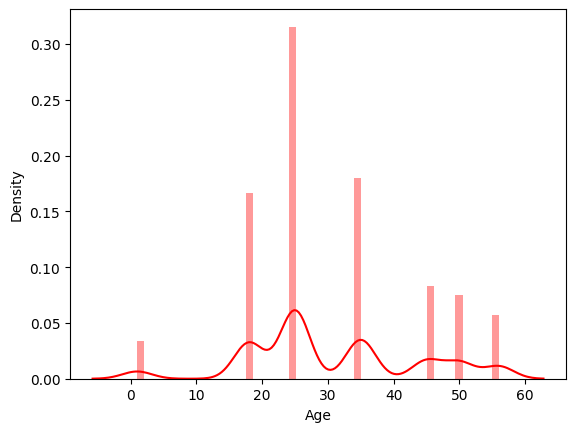

In [120]:
sns.distplot(df['Age'],color='red')

In [104]:
# Count occurrenceof each rating
rating_counts = df_rating['Rating'].value_counts()

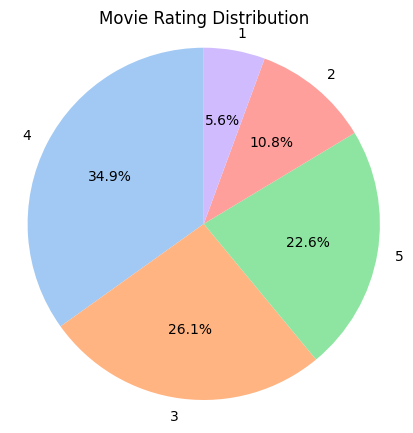

In [110]:
# Create a pie Chat
plt.figure(figsize=(5,5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Movie Rating Distribution')
plt.axis('equal')
plt.show()

Model Building

In [125]:
first_700 = filter_df[700:]

first_700.dropna(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6176\1062519544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_700.dropna(inplace=True)


In [126]:
# Splitting of data into train and test sets
x = first_700.drop(['Genre'],axis=1)
y = first_700['Rating']

In [127]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=4)

In [128]:
print(x.shape, y_train.shape, x_test.shape )

(673921, 3) (539136,) (134785, 3)


# Training Model

In [129]:
model = LogisticRegression()

In [130]:
x_encoded = pd.get_dummies(x)

In [131]:
model.fit(x_train, y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation Model

In [133]:
# Mean Squared Error
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.8043402455762881


In [134]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error',rmse)

Root Mean Squared Error 0.896850180117219


In [135]:
# training accuracy
log = round(model.score(x_train, y_train) * 100, 2)
print(log)

50.12


In [136]:
# Test accuracy
log = round(model.score(x_test, y_test) * 100, 2)
print(log)

50.15
